In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [157]:
df = pd.read_csv('data2.csv')

In [158]:
df = df.drop('STORE', axis=1)

In [1]:
df.head()

NameError: name 'df' is not defined

In [2]:
df.columns = ['Month', 'Sales']
df.head()

NameError: name 'df' is not defined

In [161]:
df.shape

(107, 2)

In [162]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [163]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [164]:
df.drop(106, axis=0, inplace=True)

In [165]:
df.drop(105, axis=0, inplace=True)

In [166]:
df.shape

(105, 2)

In [167]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [168]:
df['Month'] = pd.to_datetime(df['Month'])

In [169]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [170]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [171]:
df.set_index('Month', inplace=True)

In [172]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [173]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

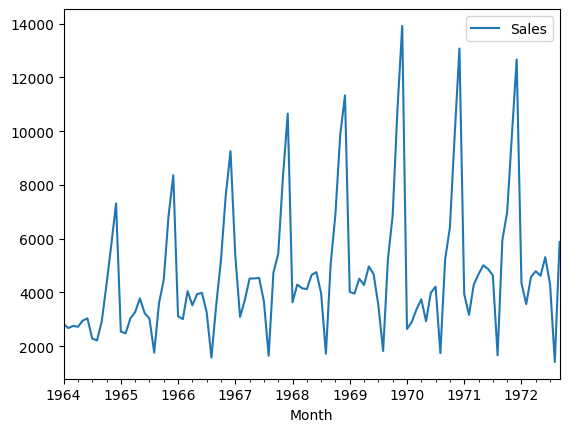

In [174]:
df.plot()

In [175]:
adfuller(df['Sales'])

(-1.833593056327623,
 0.363915771660245,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [189]:
def adfuller_test(sales):
    result = adfuller(sales)
    
    labels = ['ADF test statistics', 'p-value', 'Lags used', 'Number of obs used']
    
    for value, label in zip(result, labels):
        print('{} : {} '.format(label, value))
        
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis, reject the null hypothesis and data is stationary')
    else:
        print('Weak evidence against null hypothesis, accept the null hypothesis and data is not stationary')

In [190]:
adfuller_test(df['Sales'])

ADF test statistics : -1.833593056327623 
p-value : 0.363915771660245 
Lags used : 11 
Number of obs used : 93 
Weak evidence against null hypothesis, accept the null hypothesis and data is not stationary


In [191]:
df

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


In [192]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [193]:
df['Sales first diff.'] = df['Sales'] - df['Sales'].shift(1)

In [194]:
df.head()

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [195]:
df['Seasonal first diff.'] = df['Sales'] - df['Sales'].shift(12)

In [196]:
df.head()

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [197]:
adfuller_test(df['Seasonal first diff.'].dropna())

ADF test statistics : -7.626619157213164 
p-value : 2.060579696813685e-11 
Lags used : 0 
Number of obs used : 92 
Strong evidence against null hypothesis, reject the null hypothesis and data is stationary


<Axes: xlabel='Month'>

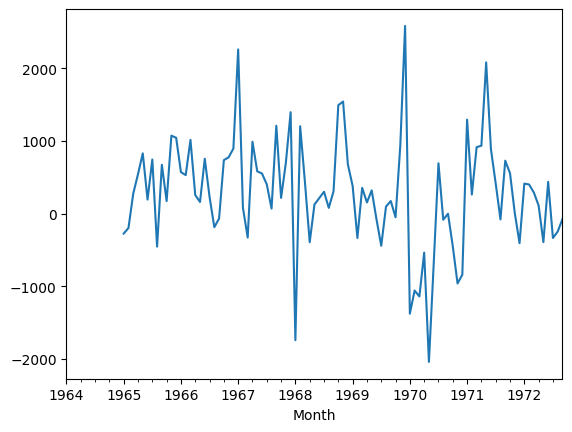

In [198]:
df['Seasonal first diff.'].plot()

In [186]:
df.head(15)

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


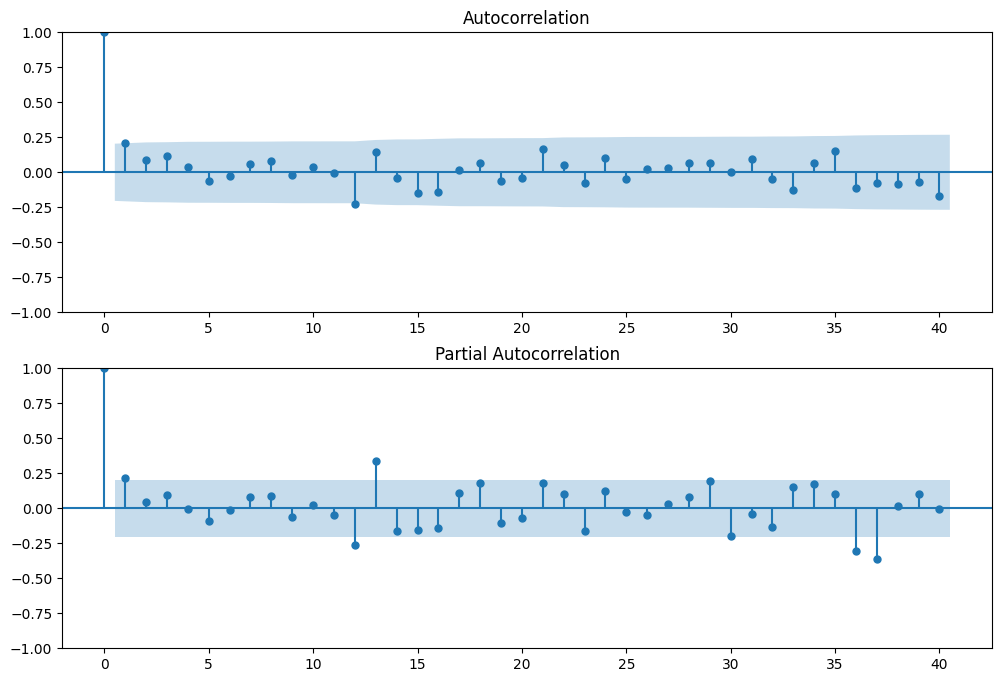

In [199]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal first diff.'].iloc[13:], lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal first diff.'].iloc[13:], lags=40, ax=ax2)

In [200]:
model = ARIMA(df['Sales'], order=(1,1,1))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [201]:
model = model.fit()

In [202]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                 1272
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -21274.891
Date:                            Fri, 28 Apr 2023   AIC                          42559.781
Time:                                    09:34:48   BIC                          42585.472
Sample:                                         0   HQIC                         42569.436
                                           - 1272                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3901      0.160     -2.437      0.015      -0.704      -0.076
ma.L1          0.6879      0.130      5.311      0.000       0.434       0.942
ar.S.L12      -0.2332      0.069     -3.388      0.001      -0.368      -0.098
ma.S.L12      -0.9586      0.047    -20.428      0.000      -1.051      -0.867
sigma2      5.223e+13    3.2e-16   1.63e+29      0.000    5.22e+13    5.22e+13
===================================================================================
Ljung-Box (L1) (Q):                   2.67   Jarque-Bera (JB):               127.12
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.78e+45. Standard errors may be unstable.
"""

In [203]:
df.shape

(105, 3)

In [204]:
df['forecast'] = model.predict(start=90, end=103, dynamic=True)

In [205]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,NaN
1971-08-01,1659.0,-2974.0,-79.0,NaN
1971-09-01,5951.0,4292.0,730.0,NaN
1971-10-01,6981.0,1030.0,557.0,NaN


<Axes: xlabel='Month'>

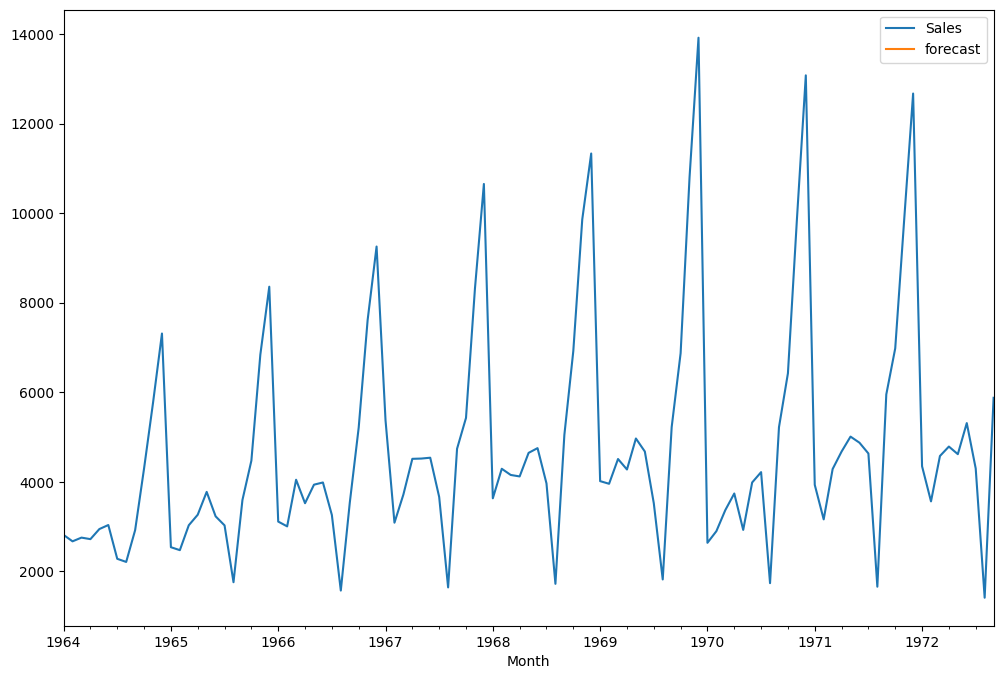

In [206]:
df[['Sales', 'forecast']].plot(figsize=(12,8))

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

In [ ]:
results = model.fit()

In [ ]:
df['forecast_SARIMAX'] = results.predict(start=90, end=103, dynamic=True)

In [ ]:
df.tail(20)

In [ ]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,10))

In [ ]:
future_dates = [df.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_dates[1:]

In [ ]:
future_dataset = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [ ]:
future_dataset.tail()

In [ ]:
future_df = pd.concat([df, future_dataset])

In [ ]:
future_df.shape

In [ ]:
future_df['forecast_SARIMAX2'] = results.predict(start=1000, end=1270, dynamic=True)

In [ ]:
future_df[['Sales', 'forecast_SARIMAX2']].plot(figsize=(12,8))